<a href="https://colab.research.google.com/github/AbirHentati/Prodigy-InfoTech/blob/main/Fake_Card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
from sklearn.metrics import classification_report , confusion_matrix ,accuracy_score

In [ ]:
#import the dataset
df = pd.read_csv('/content/news.csv')
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [ ]:
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training', marker='o')
    plt.plot(history.history['val_accuracy'], label='Validation', marker='o')
    plt.title('Model Accuracy')
    plt.xlabel('Seasons')
    plt.ylabel('Precision')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training', marker='o')
    plt.plot(history.history['val_loss'], label='Validation', marker='o')
    plt.title('Model Accuracy')
    plt.xlabel('Seasons')
    plt.ylabel('Precision')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True Label')
    plt.xlabel('Expected Label')
    plt.tight_layout()

In [ ]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [ ]:
X = df['text'].values
y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
max_words = 10000
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [ ]:
max_sequence_length = 1000  # Tamanho máximo da sequência
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length, padding='post', truncating='post')

In [ ]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    verbose=1,
    restore_best_weights=True
)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_words, output_dim=32, input_length=max_sequence_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
epochs = 10
batch_size = 64

history = model.fit(X_train_padded,
                    y_train_encoded,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(X_test_padded, y_test_encoded),
                    callbacks=[early_stopping])

loss, accuracy = model.evaluate(X_test_padded, y_test_encoded)
print(f'Model accuracy: {accuracy * 100:.2f}%')

Epoch 1/10
80/80 [==============================] - 7s 57ms/step - loss: 0.4942 - accuracy: 0.7514 - val_loss: 0.2431 - val_accuracy: 0.9053
Epoch 2/10
80/80 [==============================] - 6s 70ms/step - loss: 0.1011 - accuracy: 0.9655 - val_loss: 0.1531 - val_accuracy: 0.9384
Epoch 3/10
80/80 [==============================] - 4s 51ms/step - loss: 0.0223 - accuracy: 0.9959 - val_loss: 0.1544 - val_accuracy: 0.9392
Epoch 4/10
80/80 [==============================] - 4s 50ms/step - loss: 0.0102 - accuracy: 0.9984 - val_loss: 0.1505 - val_accuracy: 0.9448
Epoch 5/10
80/80 [==============================] - 5s 59ms/step - loss: 0.0040 - accuracy: 0.9996 - val_loss: 0.1556 - val_accuracy: 0.9440
Epoch 6/10
80/80 [==============================] - 4s 56ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.1620 - val_accuracy: 0.9455
Epoch 7/10
80/80 [==============================] - 4s 46ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.1632 - val_accuracy: 0.9455
Epoch 7: earl

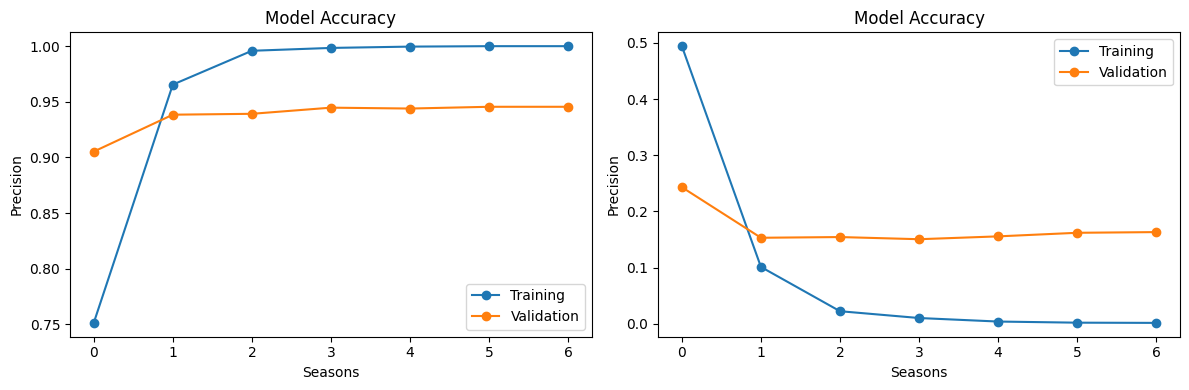

In [ ]:
plot_training_history(history)

40/40 [==============================] - 0s 7ms/step


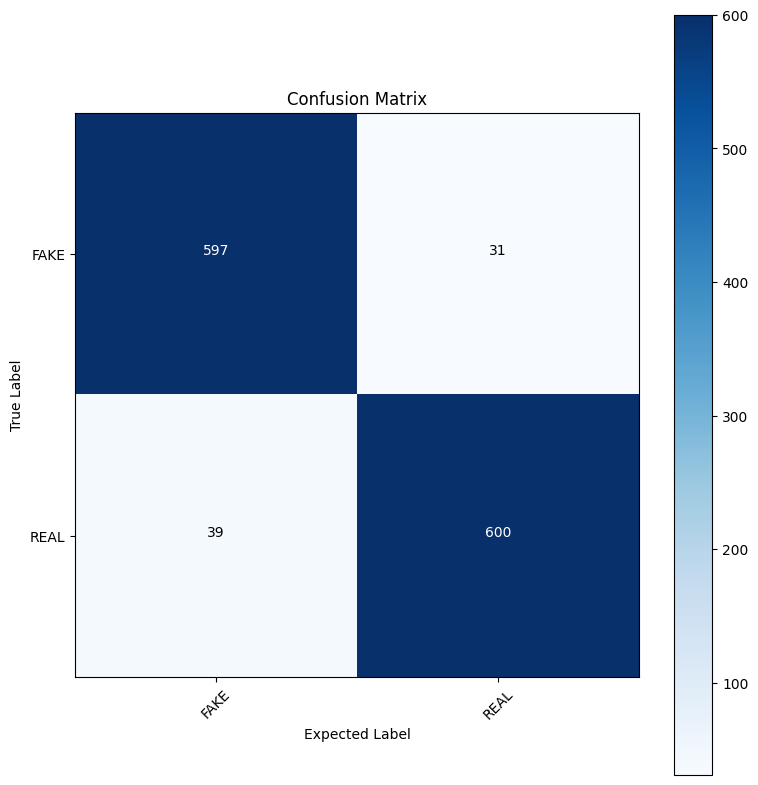

In [ ]:
threshold = 0.5
y_pred = model.predict(X_test_padded)
y_pred_classes = (y_pred > threshold).astype(int)
y_true = y_test_encoded

class_names = ['FAKE', 'REAL']

plot_confusion_matrix(y_true, y_pred_classes, classes=class_names)

plt.show()